<a href="https://colab.research.google.com/github/heriswn/LatihanDTS/blob/master/0808_heri002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweets.cvs

# PreProssesing

In [330]:
import pandas as pd
import re
dsentiment = pd.read_csv('tweets.csv')
dsent = dsentiment[['airline_sentiment','text']]
dsent.head(2)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...


In [0]:
import nltk
stop_words = nltk.corpus.stopwords.words('english')
text_table = dsent.text
text_table = text_table.apply(lambda x: ' '.join(
term for term in x.split() if term not in set(stop_words)))

In [0]:
text_table = text_table.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr')
#text_table = text_table.str.replace(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*), 'httpaddr')
text_table = text_table.str.replace(r'£|\$', 'moneysymb')
text_table = text_table.str.replace(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{4}\b', 'phonenumber')
text_table = text_table.str.replace(r'\d+(\.\d+)?', 'numbr')
text_table = text_table.str.replace(r'[^\w\d\s]', ' ')
text_table = text_table.str.replace(r'\s+', ' ')
text_table = text_table.str.replace(r'^\s+|\s+?$', '')
text_table = text_table.str.lower()

In [0]:
porter = nltk.PorterStemmer()
text_table = text_table.apply(lambda x: ' '.join(
  porter.stem(term) for term in x.split())
)

# Manual Classification

In [334]:
import pandas as pd
dsentiment = pd.read_csv('tweets.csv')
dsentiment.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [335]:
dsent = dsentiment[['airline_sentiment','text']]
dsent.head(2)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...


Text(0, 0.5, 'Number of Sentiment Texts')

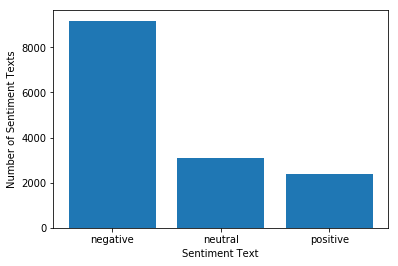

In [336]:
import matplotlib.pyplot as plt
spam_count = dsent.groupby('airline_sentiment').count()
plt.bar(spam_count.index.values, spam_count['text'])
plt.xlabel('Sentiment Text')
plt.ylabel('Number of Sentiment Texts')

In [337]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')
text_table = dsent.text
dsent.text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

In [0]:
text_table = text_table.apply(lambda x: ' '.join(
    term for term in x.split() if term not in set(stop_words))
)
text_table = text_table.str.replace(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr')
text_table = text_table.str.lower()
text_table = text_table.str.replace(r'[^\w\d\s]', ' ')
text_table = text_table.str.replace(r'\s+', ' ')
text_table = text_table.str.replace(r'^\s+|\s+?$', ' ')

In [339]:
porter = nltk.PorterStemmer()
dsent.text = text_table.apply(lambda x: ' '.join(
    porter.stem(term) for term in x.split())
)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [341]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text1 = cv.fit_transform(text_table)
text1

<14640x14780 sparse matrix of type '<class 'numpy.int64'>'
	with 138722 stored elements in Compressed Sparse Row format>

In [0]:
s = ' '.join(dsent.text)
str_list = s.lower().split()
unique_words = set(str_list)

In [0]:
dictwords = dict()
for words in unique_words:
    dictwords[words] = [str_list.count(words)]

In [0]:
dsentpositive = dsent[dsent.airline_sentiment == 'positive']
dsentnegative = dsent[dsent.airline_sentiment == 'negative']
dsentnatural = dsent[dsent.airline_sentiment == 'natural']

In [0]:
spositive = ' '.join(dsentpositive.text)
snegative = ' '.join(dsentnegative.text)
snatural = ' '.join(dsentnatural.text)

In [0]:
spositive_list = spositive.lower().split()
snegative_list = snegative.lower().split()
snatural_list = snatural.lower().split()

In [0]:
for words in unique_words:
    ipositive = spositive_list.count(words)
    inegative = snegative_list.count(words)
    inatural = snatural_list.count(words)
    dictwords[words].append(ipositive)
    dictwords[words].append(inegative)
    dictwords[words].append(inatural)
    dictwords[words].append(inegative - ipositive)
    dictwords[words].append(ipositive - inegative)

In [0]:
sortnegative = sorted(dictwords.items(), key=lambda x: x[1][4], reverse=True)
sortpositive = sorted(dictwords.items(), key=lambda x: x[1][5], reverse=True)
sortnatural = sorted(dictwords.items(), key=lambda x: x[1][3], reverse=True)

In [0]:
dictneg = sortnegative[:100]
dictpos = sortpositive[:100]
dictnet = sortnatural[:100]

## Ngambil banyaknya kata postive, negative

In [0]:
newlistneg = []
for i in dictneg:
    newlistneg.append(i[0])

In [0]:
newlistpos = []
for i in dictpos:
    newlistpos.append(i[0])

In [0]:
newlistnat = []
for i in dictnet:
    newlistnet.append(i[0])

In [352]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
threshold = 3
sentimenttext = []

for text in dsent.text:
  count_pos=0
  count_neg=0
  count_net=0
  for word in text.split():
    if word in newlistpos:
       count_pos+=1
    if word in newlistneg:
       count_neg+=1
  if count_pos > threshold & count_neg > threshold & count_net > threshold & count_pos > count_neg > count_net:
      sentimenttext.append('positive')
  elif count_pos > threshold & count_neg > threshold & count_net > threshold & count_neg > count_pos > count_net:
      sentimenttext.append('negative')
  elif count_pos > threshold & count_neg > threshold & count_net > threshold & count_net > count_pos > count_net:
      sentimenttext.append('natural')
  elif count_pos > threshold & count_neg > threshold & count_net > threshold & count_net > count_neg > count_pos:
      sentimenttext.append('natural')
  elif count_pos > threshold:
      sentimenttext.append('positive')
  elif count_neg > threshold:
      sentimenttext.append('negative')
  elif count_net > threshold:
      sentimenttext.append('natural')
  
     

In [372]:
count = 0

for i in range(0, len(sentimenttext)):
    if sentimenttext[i] == dsent.airline_sentiment[i]:
        count += 1

accuracy=count/len(sentimenttext)
print('accuracy =',accuracy)

accuracy = 0.5794821690278457


# Netural Network for Text Classification

In [355]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dsent['sent_code'] = lb_make.fit_transform(dsent['airline_sentiment'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_counts = cv.fit_transform(dsent['text'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, dsent['sent_code'], test_size=0.3, random_state=123)

In [358]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('MultinomialNB Accuracy:', metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7670765027322405


# Coba yang lain

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm": SVC(kernel="rbf", gamma="auto"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
}

In [361]:
for i in models:
    models[i].fit(X_train, y_train)
    predicted = models[i].predict(X_test)
    print('{} Accuracy: {}'.format(i, metrics.accuracy_score(y_test, predicted)))

knn Accuracy: 0.5209471766848816


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


logit Accuracy: 0.8010018214936248
svm Accuracy: 0.6318306010928961
decision_tree Accuracy: 0.6894353369763205
random_forest Accuracy: 0.7691256830601093
